In [3]:
from dask.distributed import Client, LocalCluster
import tpot
import sklearn
import sklearn.datasets
import numpy as np

import tpot.objectives


scorer = sklearn.metrics.get_scorer('roc_auc_ovr')

X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)


est = tpot.TPOTClassifier(
    scorers=[scorer, tpot.objectives.complexity_scorer],
    scorers_weights=[1.0, -1.0],

    search_space="linear",
    n_jobs=4, 
    max_time_mins=60, 
    max_eval_time_mins=10,
    early_stop=2,
    verbose=2,)
est.fit(X_train, y_train)

print(scorer(est, X_test, y_test))

Generation: : 6it [08:10, 81.70s/it]


0.997971602434077


In [4]:
best_pipeline = est.fitted_pipeline_
best_pipeline

,steps,"[('standardscaler', ...), ('passthrough', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,transformer_list,"[('featureunion', ...), ('passthrough', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False


In [5]:
best_pipeline.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [6]:
#get the score/objective column names generated by TPOT
est.objective_names

['roc_auc_score', 'complexity_scorer']

In [7]:
df = est.evaluated_individuals
df

,roc_auc_score,complexity_scorer,Parents,Variation_Function,Individual,Generation,Submitted Timestamp,Completed Timestamp,Eval Error,Pareto_Front,Instance
0,0.988320,1269.0,NaN,NaN,<tpot.search_spaces.pipelines.sequential.Seque...,0.0,1.754340e+09,1.754340e+09,None,NaN,"(MaxAbsScaler(), SelectFromModel(estimator=Ext..."
1,NaN,NaN,NaN,NaN,<tpot.search_spaces.pipelines.sequential.Seque...,0.0,1.754340e+09,1.754340e+09,INVALID,NaN,"(MinMaxScaler(), Passthrough(), FeatureUnion(t..."
2,NaN,NaN,NaN,NaN,<tpot.search_spaces.pipelines.sequential.Seque...,0.0,1.754340e+09,1.754340e+09,INVALID,NaN,"(Normalizer(norm=np.str_('l2')), RFE(estimator..."
3,NaN,NaN,NaN,NaN,<tpot.search_spaces.pipelines.sequential.Seque...,0.0,1.754340e+09,1.754340e+09,INVALID,NaN,"(StandardScaler(), SelectFromModel(estimator=E..."
4,0.955930,450.0,NaN,NaN,<tpot.search_spaces.pipelines.sequential.Seque...,0.0,1.754340e+09,1.754340e+09,None,NaN,"(Normalizer(norm=np.str_('l2')), RFE(estimator..."
...,...,...,...,...,...,...,...,...,...,...,...
345,0.994206,36.0,"(225, 225)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,6.0,1.754341e+09,1.754341e+09,None,NaN,"(StandardScaler(), VarianceThreshold(threshold..."
346,0.994248,50.0,"(139, 139)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,6.0,1.754341e+09,1.754341e+09,None,NaN,"(StandardScaler(), SelectFwe(alpha=0.001145801..."
347,0.992780,22.0,"(175, 227)",ind_crossover,<tpot.search_spaces.pipelines.sequential.Seque...,6.0,1.754341e+09,1.754341e+09,None,NaN,"(MinMaxScaler(), SelectPercentile(percentile=5..."
348,0.993373,214.1,"(243, 243)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,6.0,1.754341e+09,1.754341e+09,None,NaN,"(StandardScaler(), VarianceThreshold(threshold..."


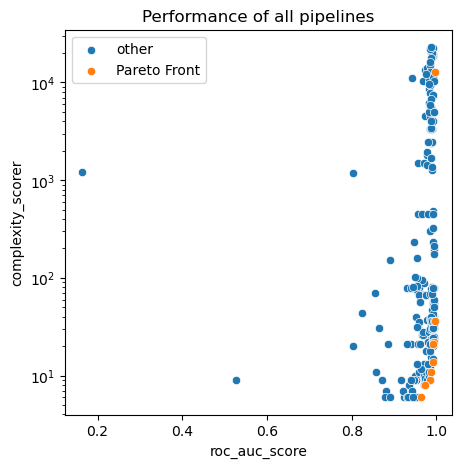

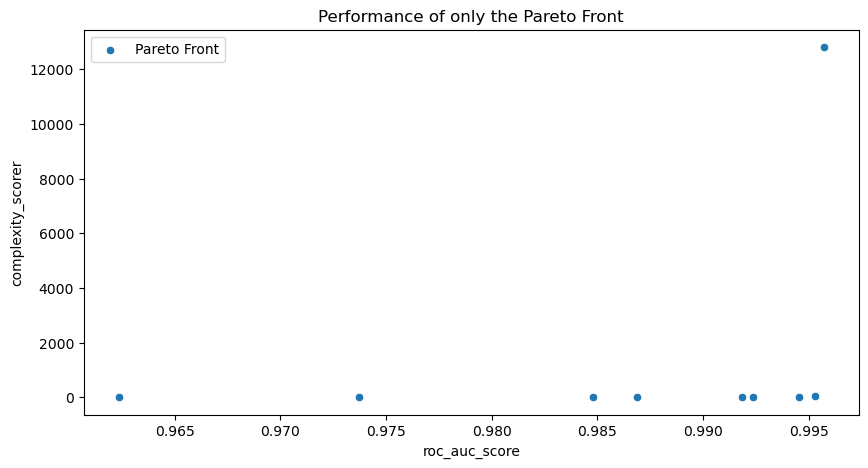

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#replace nans in pareto front with 0
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(df[df['Pareto_Front']!=1], x='roc_auc_score', y='complexity_scorer', label='other', ax=ax)
sns.scatterplot(df[df['Pareto_Front']==1], x='roc_auc_score', y='complexity_scorer', label='Pareto Front', ax=ax)
ax.title.set_text('Performance of all pipelines')
#log scale y
ax.set_yscale('log')
plt.show()

#replace nans in pareto front with 0
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(df[df['Pareto_Front']==1], x='roc_auc_score', y='complexity_scorer', label='Pareto Front', ax=ax)
ax.title.set_text('Performance of only the Pareto Front')
#log scale y
# ax.set_yscale('log')
plt.show()

In [9]:
#plot only the pareto front pipelines
sorted_pareto_front = df[df['Pareto_Front']==1].sort_values('roc_auc_score', ascending=False)
sorted_pareto_front

,roc_auc_score,complexity_scorer,Parents,Variation_Function,Individual,Generation,Submitted Timestamp,Completed Timestamp,Eval Error,Pareto_Front,Instance
151,0.995710,12807.0,"(130, 130)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,3.0,1.754340e+09,1.754340e+09,None,1.0,"(StandardScaler(), Passthrough(), FeatureUnion..."
163,0.995302,36.0,"(115, 115)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,3.0,1.754340e+09,1.754340e+09,None,1.0,"(StandardScaler(), VarianceThreshold(threshold..."
52,0.994546,21.9,"(34, 28)",ind_crossover,<tpot.search_spaces.pipelines.sequential.Seque...,1.0,1.754340e+09,1.754340e+09,None,1.0,"(StandardScaler(), SelectPercentile(percentile..."
109,0.992370,21.0,"(61, 80)",ind_crossover,<tpot.search_spaces.pipelines.sequential.Seque...,2.0,1.754340e+09,1.754340e+09,None,1.0,"(StandardScaler(), RFE(estimator=ExtraTreesCla..."
286,0.991852,13.8,"(218, 218)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,5.0,1.754340e+09,1.754340e+09,None,1.0,"(StandardScaler(), SelectPercentile(percentile..."
257,0.986863,11.0,"(209, 209)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,5.0,1.754341e+09,1.754341e+09,None,1.0,"(MinMaxScaler(), VarianceThreshold(threshold=0..."
114,0.984786,9.0,"(90, 90)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,2.0,1.754340e+09,1.754340e+09,None,1.0,"(StandardScaler(), RFE(estimator=ExtraTreesCla..."
337,0.973728,8.0,"(275, 275)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,6.0,1.754341e+09,1.754341e+09,None,1.0,"(MinMaxScaler(), SelectPercentile(percentile=4..."
304,0.962371,6.0,"(192, 192)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,6.0,1.754341e+09,1.754341e+09,None,1.0,"(MinMaxScaler(), RFE(estimator=ExtraTreesClass..."


In [10]:
#access the best performing pipeline with the lowest complexity

best_pipeline_lowest_complexity = sorted_pareto_front.iloc[-1]['Instance']
best_pipeline_lowest_complexity

,steps,"[('minmaxscaler', ...), ('rfe', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,estimator,"ExtraTreesCla...t=4, n_jobs=1)"
,n_features_to_select,None
,step,0.1759894492466
,verbose,0


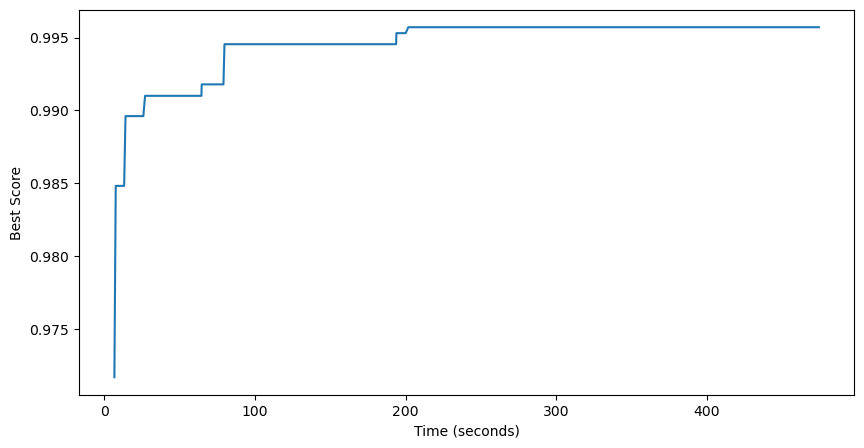

In [11]:
#get columns where roc_auc_score is not NaN
scores_and_times = df[df['roc_auc_score'].notna()][['roc_auc_score', 'Completed Timestamp']].sort_values('Completed Timestamp', ascending=True).to_numpy()

#get best score at a given time
best_scores = np.maximum.accumulate(scores_and_times[:,0])
times = scores_and_times[:,1]
times = times - df['Submitted Timestamp'].min()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(times, best_scores)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Best Score')
plt.show()
